In [3]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import scipy.stats as stats
import pylab 

In [4]:
import sys
sys.path.append("..")
import src.spatial_pattern as ssp
import src.pattern_statistic as sps
import src.index_statistic as sis
import src.eof_plots as sept

import importlib
importlib.reload(ssp) # after changed the source code
importlib.reload(sps)
importlib.reload(sis)
importlib.reload(sept)



# Data load and pre-process

<module 'src.eof_plots' from '/work/mh0033/m300883/3rdPanel/scripts/../src/eof_plots.py'>

In [5]:
allens = xr.open_dataset("/work/mh0033/m300883/transition/gr19/gphSeason/allens_season_time.nc")
# split ens
splitens = ssp.split_ens(allens)
# demean ens-mean
demean = splitens-splitens.mean(dim = 'ens')
#select traposphere
trop = demean.sel(hlayers = slice(20000,100000))


# first row: project all onto the three spatial patterns.

In [6]:
_,all_all,_ = ssp.season_eof(trop.var156, nmode=2,window=10,
fixed_pattern="all")  # "method" doesn't matter since the pc is 
                      # calculated independently.
_, all_first,_ = ssp.season_eof(trop.var156,nmode=2,window=10,
fixed_pattern="first")
_, all_last,_ = ssp.season_eof(trop.var156,nmode=2,window=10,
fixed_pattern="last")

# standarize
"""
all standard with mean and std of all_all
"""

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

'\nall standard with mean and std of all_all\n'

In [7]:
all_mean = all_all.mean(dim = 'time')
all_std = all_all.std(dim = 'time')

all_all = (all_all-all_mean)/all_std
all_first = (all_first-all_mean)/all_std
all_last = (all_last-all_mean)/all_std

# second row: first 10 years of data projected on all, first10,and last10 eofs.

In [8]:
first_all = all_all.isel(time=slice(0,10))
first_first = all_first.isel(time = slice(0,10))
first_last = all_last.isel(time = slice(0,10))


# third row: last 10 years of data projected on all, first10 and last10 eofs

In [9]:
last_all = all_all.isel(time = slice(-10,None))
last_first = all_first.isel(time = slice(-10,None))
last_last = all_last.isel(time = slice(-10,None))



################# mix ###############################
# The first_on_all and first_on_first, vs last_on_all and last_on_last

In [10]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import scipy.stats as stats
import pylab 

In [11]:
# hist
first_NAO_dfs = sis.pc_column([first_first,first_all,first_last])

<AxesSubplot:xlabel='pc', ylabel='Count'>

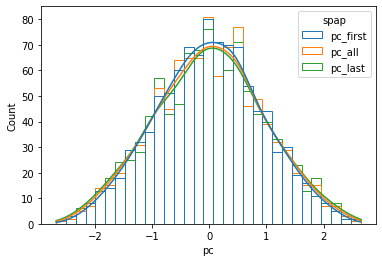

In [12]:
sns.histplot(first_NAO_dfs.loc[50000],x = 'pc',hue = 'spap',kde=True,fill=False,
)

In [13]:
first_EA_dfs = sis.pc_column([first_first,first_all,first_last],mode = 'EA')

<AxesSubplot:xlabel='pc', ylabel='Count'>

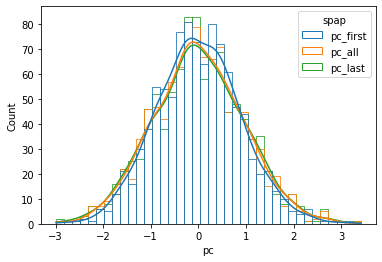

In [14]:
sns.histplot(first_EA_dfs.loc[50000],x = 'pc',hue = 'spap',kde=True,fill=False,
)

TypeError: probplot() got an unexpected keyword argument 'ax'

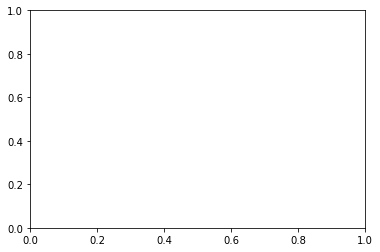

In [15]:
first_first_NAO = first_first.sel(mode = 'NAO').values
first_all_NAO = first_all.sel(mode = 'NAO').values
first_last_NAO = first_last.sel(mode = 'NAO').values

fig,ax = plt.subplots()
stats.probplot(first_first_NAO.reshape(-1),dist = 'norm',plot = pylab,ax = ax,color= 'b')
stats.probplot(first_all_NAO.reshape(-1),dist = 'norm',plot = pylab,ax = ax,color= 'k')
stats.probplot(first_last_NAO.reshape(-1),dist = 'norm',plot = pylab,ax = ax,color= 'r')

TypeError: probplot() got an unexpected keyword argument 'color'

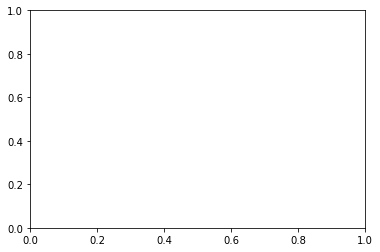

In [16]:
first_first_NAO = first_first.sel(mode = 'NAO').values
first_all_NAO = first_all.sel(mode = 'NAO').values
first_last_NAO = first_last.sel(mode = 'NAO').values

fig,ax = plt.subplots()
stats.probplot(first_first_NAO.reshape(-1),dist = 'norm',plot = ax,color= 'b')
stats.probplot(first_all_NAO.reshape(-1),dist = 'norm',plot = ax,color= 'k')
stats.probplot(first_last_NAO.reshape(-1),dist = 'norm',plot =  ax,color= 'r')

((array([-3.83410405, -3.61025261, -3.48741655, ...,  3.48741655,
          3.61025261,  3.83410405]),
  array([-2.83523664, -2.8220838 , -2.82038714, ...,  2.6476069 ,
          2.65697105,  2.66929256])),
 (0.9785781448812503, -3.8025206567365124e-05, 0.9990393215889318))

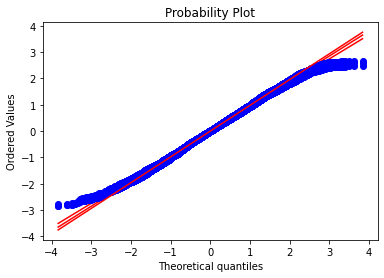

In [17]:
first_first_NAO = first_first.sel(mode = 'NAO').values
first_all_NAO = first_all.sel(mode = 'NAO').values
first_last_NAO = first_last.sel(mode = 'NAO').values

fig,ax = plt.subplots()
stats.probplot(first_first_NAO.reshape(-1),dist = 'norm',plot = ax)
stats.probplot(first_all_NAO.reshape(-1),dist = 'norm',plot = ax)
stats.probplot(first_last_NAO.reshape(-1),dist = 'norm',plot =  ax)

In [18]:
stats.probplot(first_first_NAO.reshape(-1),dist = 'norm')

((array([-3.83410405, -3.61025261, -3.48741655, ...,  3.48741655,
          3.61025261,  3.83410405]),
  array([-2.76384035, -2.7565777 , -2.74517956, ...,  2.45461702,
          2.45551603,  2.46750624])),
 (0.9143909799611879, -9.258189832592261e-05, 0.9991299497916003))

In [19]:
stats.probplot(first_first_NAO.reshape(-1),dist = 'norm',plot = None)

((array([-3.83410405, -3.61025261, -3.48741655, ...,  3.48741655,
          3.61025261,  3.83410405]),
  array([-2.76384035, -2.7565777 , -2.74517956, ...,  2.45461702,
          2.45551603,  2.46750624])),
 (0.9143909799611879, -9.258189832592261e-05, 0.9991299497916003))

In [20]:
stats.probplot(first_first_NAO.reshape(-1),dist = 'norm',plot = None,fit = False)

(array([-3.83410405, -3.61025261, -3.48741655, ...,  3.48741655,
         3.61025261,  3.83410405]),
 array([-2.76384035, -2.7565777 , -2.74517956, ...,  2.45461702,
         2.45551603,  2.46750624]))

((array([-3.83410405, -3.61025261, -3.48741655, ...,  3.48741655,
          3.61025261,  3.83410405]),
  array([-2.76384035, -2.7565777 , -2.74517956, ...,  2.45461702,
          2.45551603,  2.46750624])),
 (0.9143909799611879, -9.258189832592261e-05, 0.9991299497916003))

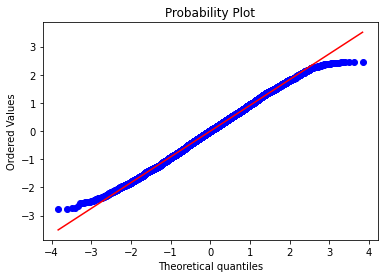

In [21]:
fig,ax = plt.subplots()
stats.probplot(first_first_NAO.reshape(-1),dist = 'norm',plot = ax)


In [22]:
ax.get_lines()

<a list of 2 Line2D objects>

In [23]:
ax.get_lines()[0]

In [24]:
ax.get_lines()[0].set_markerfacecolor('r')

In [25]:
plt.show()

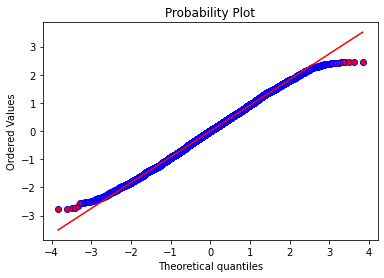

In [26]:
fig,ax = plt.subplots()
stats.probplot(first_first_NAO.reshape(-1),dist = 'norm',plot = ax)
ax.get_lines()[0].set_markerfacecolor('r')

AttributeError: 'Line2D' object has no attribute 'set_linefacecolor'

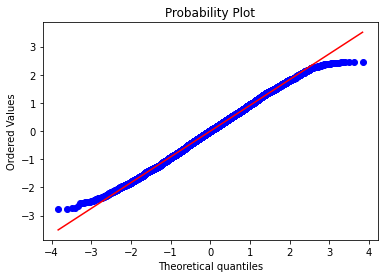

In [27]:
fig,ax = plt.subplots()
stats.probplot(first_first_NAO.reshape(-1),dist = 'norm',plot = ax)
ax.get_lines()[1].set_linefacecolor('r')

AttributeError: 'Line2D' object has no attribute 'set_linecolor'

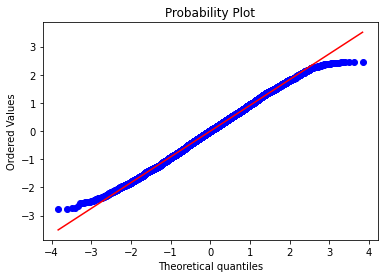

In [28]:
fig,ax = plt.subplots()
stats.probplot(first_first_NAO.reshape(-1),dist = 'norm',plot = ax)
ax.get_lines()[1].set_linecolor('r')

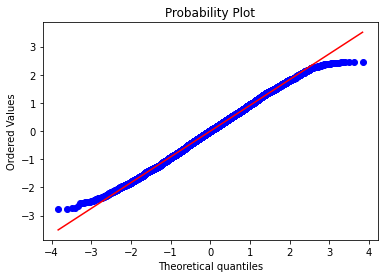

In [29]:
fig,ax = plt.subplots()
stats.probplot(first_first_NAO.reshape(-1),dist = 'norm',plot = ax)
ax.get_lines()[1].set_color('r')

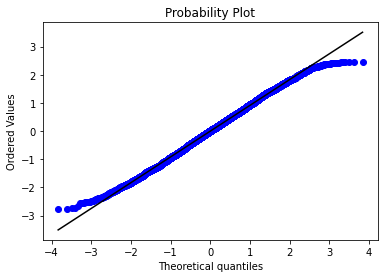

In [30]:
fig,ax = plt.subplots()
stats.probplot(first_first_NAO.reshape(-1),dist = 'norm',plot = ax)
ax.get_lines()[1].set_color('k')

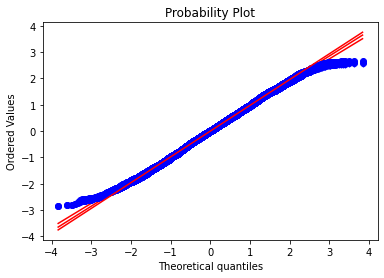

In [31]:
first_first_NAO = first_first.sel(mode = 'NAO').values
first_all_NAO = first_all.sel(mode = 'NAO').values
first_last_NAO = first_last.sel(mode = 'NAO').values

fig,ax = plt.subplots()
stats.probplot(first_first_NAO.reshape(-1),dist = 'norm',plot = ax)
stats.probplot(first_all_NAO.reshape(-1),dist = 'norm',plot = ax)
stats.probplot(first_last_NAO.reshape(-1),dist = 'norm',plot =  ax)

ax.get_lines()[0].set_markerfacecolor('b')
ax.get_lines()[0].set_markersize(1)

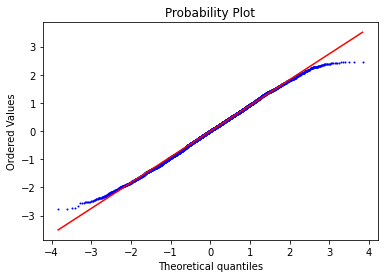

In [32]:
first_first_NAO = first_first.sel(mode = 'NAO').values
first_all_NAO = first_all.sel(mode = 'NAO').values
first_last_NAO = first_last.sel(mode = 'NAO').values

fig,ax = plt.subplots()
stats.probplot(first_first_NAO.reshape(-1),dist = 'norm',plot = ax)
# stats.probplot(first_all_NAO.reshape(-1),dist = 'norm',plot = ax)
# stats.probplot(first_last_NAO.reshape(-1),dist = 'norm',plot =  ax)

ax.get_lines()[0].set_markerfacecolor('b')
ax.get_lines()[0].set_markersize(1)

IndexError: list index out of range

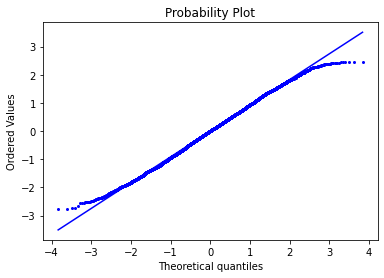

In [33]:
first_first_NAO = first_first.sel(mode = 'NAO').values
first_all_NAO = first_all.sel(mode = 'NAO').values
first_last_NAO = first_last.sel(mode = 'NAO').values

fig,ax = plt.subplots()
stats.probplot(first_first_NAO.reshape(-1),dist = 'norm',plot = ax)
# stats.probplot(first_all_NAO.reshape(-1),dist = 'norm',plot = ax)
# stats.probplot(first_last_NAO.reshape(-1),dist = 'norm',plot =  ax)

ax.get_lines()[0].set_markerfacecolor('b')
ax.get_lines()[0].set_markersize(2)
ax.get_lines()[1].set_color('b')

ax.get_lines()[2].set_markerfacecolor('r')
ax.get_lines()[2].set_markersize(2)
ax.get_lines()[3].set_color('r')

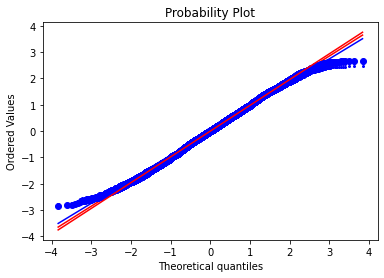

In [34]:
first_first_NAO = first_first.sel(mode = 'NAO').values
first_all_NAO = first_all.sel(mode = 'NAO').values
first_last_NAO = first_last.sel(mode = 'NAO').values

fig,ax = plt.subplots()
stats.probplot(first_first_NAO.reshape(-1),dist = 'norm',plot = ax)
stats.probplot(first_all_NAO.reshape(-1),dist = 'norm',plot = ax)
stats.probplot(first_last_NAO.reshape(-1),dist = 'norm',plot =  ax)

ax.get_lines()[0].set_markerfacecolor('b')
ax.get_lines()[0].set_markersize(2)
ax.get_lines()[1].set_color('b')

ax.get_lines()[2].set_markerfacecolor('r')
ax.get_lines()[2].set_markersize(2)
ax.get_lines()[3].set_color('r')

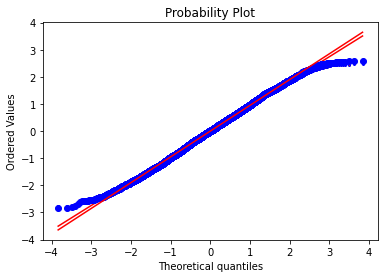

In [35]:
first_first_NAO = first_first.sel(mode = 'NAO').values
first_all_NAO = first_all.sel(mode = 'NAO').values
first_last_NAO = first_last.sel(mode = 'NAO').values

fig,ax = plt.subplots()
stats.probplot(first_first_NAO.reshape(-1),dist = 'norm',plot = ax)
ax.get_lines()[0].set_markerfacecolor('b')
ax.get_lines()[0].set_markersize(2)
ax.get_lines()[1].set_color('b')

stats.probplot(first_all_NAO.reshape(-1),dist = 'norm',plot = ax)
ax.get_lines()[0].set_markerfacecolor('r')
ax.get_lines()[0].set_markersize(2)
ax.get_lines()[1].set_color('r')

# stats.probplot(first_last_NAO.reshape(-1),dist = 'norm',plot =  ax)

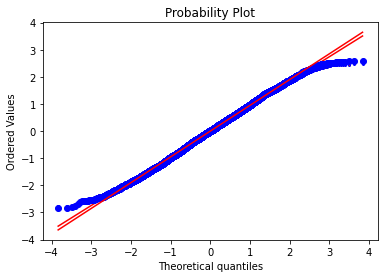

In [36]:
first_first_NAO = first_first.sel(mode = 'NAO').values
first_all_NAO = first_all.sel(mode = 'NAO').values
first_last_NAO = first_last.sel(mode = 'NAO').values

fig,ax = plt.subplots()
stats.probplot(first_first_NAO.reshape(-1),dist = 'norm',plot = ax)
ax.get_lines()[0].set_markerfacecolor('b')
ax.get_lines()[0].set_markersize(2)
ax.get_lines()[1].set_color('b')

stats.probplot(first_all_NAO.reshape(-1),dist = 'norm',plot = ax)
ax.get_lines()[0].set_markerfacecolor('r')
ax.get_lines()[0].set_markersize(2)
ax.get_lines()[1].set_color('r')

plt.show()
# stats.probplot(first_last_NAO.reshape(-1),dist = 'norm',plot =  ax)

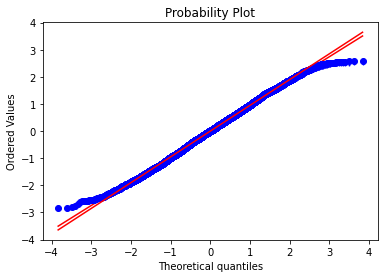

In [37]:
first_first_NAO = first_first.sel(mode = 'NAO').values
first_all_NAO = first_all.sel(mode = 'NAO').values
first_last_NAO = first_last.sel(mode = 'NAO').values

fig,ax = plt.subplots()
stats.probplot(first_first_NAO.reshape(-1),dist = 'norm',plot = ax)
ax.get_lines()[0].set_markerfacecolor('b')
ax.get_lines()[0].set_markersize(1)
ax.get_lines()[1].set_color('b')

stats.probplot(first_all_NAO.reshape(-1),dist = 'norm',plot = ax)
ax.get_lines()[0].set_markerfacecolor('r')
ax.get_lines()[0].set_markersize(1)
ax.get_lines()[1].set_color('r')

plt.show()
# stats.probplot(first_last_NAO.reshape(-1),dist = 'norm',plot =  ax)

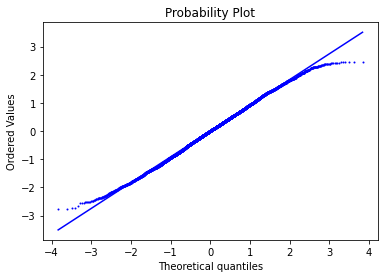

In [38]:
first_first_NAO = first_first.sel(mode = 'NAO').values
first_all_NAO = first_all.sel(mode = 'NAO').values
first_last_NAO = first_last.sel(mode = 'NAO').values

fig,ax = plt.subplots()
stats.probplot(first_first_NAO.reshape(-1),dist = 'norm',plot = ax)
ax.get_lines()[0].set_markerfacecolor('b')
ax.get_lines()[0].set_markersize(1)
ax.get_lines()[1].set_color('b')

# stats.probplot(first_all_NAO.reshape(-1),dist = 'norm',plot = ax)
# ax.get_lines()[0].set_markerfacecolor('r')
# ax.get_lines()[0].set_markersize(1)
# ax.get_lines()[1].set_color('r')


plt.show()
# stats.probplot(first_last_NAO.reshape(-1),dist = 'norm',plot =  ax)

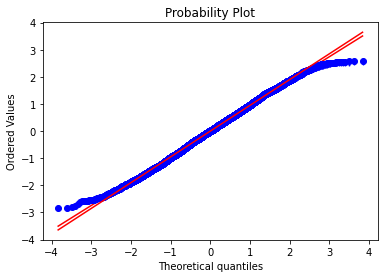

In [39]:
first_first_NAO = first_first.sel(mode = 'NAO').values
first_all_NAO = first_all.sel(mode = 'NAO').values
first_last_NAO = first_last.sel(mode = 'NAO').values

fig,ax = plt.subplots()
stats.probplot(first_first_NAO.reshape(-1),dist = 'norm',plot = ax)
ax.get_lines()[0].set_markerfacecolor('b')
ax.get_lines()[0].set_markersize(1)
ax.get_lines()[1].set_color('b')

stats.probplot(first_all_NAO.reshape(-1),dist = 'norm',plot = ax)
ax.get_lines()[0].set_markerfacecolor('r')
ax.get_lines()[0].set_markersize(1)
ax.get_lines()[1].set_color('r')


plt.show()
# stats.probplot(first_last_NAO.reshape(-1),dist = 'norm',plot =  ax)

In [40]:
ax.get_lines

<bound method _AxesBase.get_lines of <AxesSubplot:title={'center':'Probability Plot'}, xlabel='Theoretical quantiles', ylabel='Ordered Values'>>

In [41]:
ax.get_lines()

<a list of 4 Line2D objects>

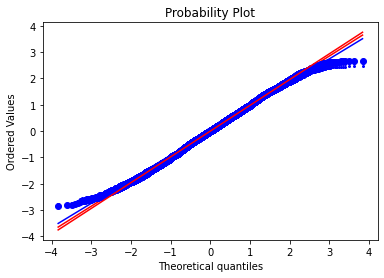

In [42]:
first_first_NAO = first_first.sel(mode = 'NAO').values
first_all_NAO = first_all.sel(mode = 'NAO').values
first_last_NAO = first_last.sel(mode = 'NAO').values

fig,ax = plt.subplots()
stats.probplot(first_first_NAO.reshape(-1),dist = 'norm',plot = ax)
stats.probplot(first_all_NAO.reshape(-1),dist = 'norm',plot = ax)
stats.probplot(first_last_NAO.reshape(-1),dist = 'norm',plot =  ax)

ax.get_lines()[0].set_markerfacecolor('b')
ax.get_lines()[0].set_markersize(2)
ax.get_lines()[1].set_color('b')

ax.get_lines()[2].set_markerfacecolor('r')
ax.get_lines()[2].set_markersize(2)
ax.get_lines()[3].set_color('r')

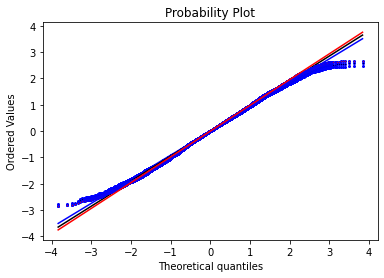

In [43]:
first_first_NAO = first_first.sel(mode = 'NAO').values
first_all_NAO = first_all.sel(mode = 'NAO').values
first_last_NAO = first_last.sel(mode = 'NAO').values

fig,ax = plt.subplots()
stats.probplot(first_first_NAO.reshape(-1),dist = 'norm',plot = ax)
stats.probplot(first_all_NAO.reshape(-1),dist = 'norm',plot = ax)
stats.probplot(first_last_NAO.reshape(-1),dist = 'norm',plot =  ax)

ax.get_lines()[0].set_markerfacecolor('b')
ax.get_lines()[0].set_markersize(2)
ax.get_lines()[1].set_color('b')

ax.get_lines()[2].set_markerfacecolor('k')
ax.get_lines()[2].set_markersize(2)
ax.get_lines()[3].set_color('k')

ax.get_lines()[4].set_markerfacecolor('r')
ax.get_lines()[4].set_markersize(2)
ax.get_lines()[5].set_color('r')

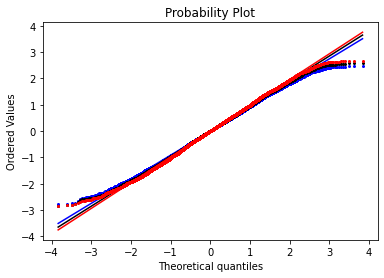

In [44]:
first_first_NAO = first_first.sel(mode = 'NAO').values
first_all_NAO = first_all.sel(mode = 'NAO').values
first_last_NAO = first_last.sel(mode = 'NAO').values

fig,ax = plt.subplots()
stats.probplot(first_first_NAO.reshape(-1),dist = 'norm',plot = ax)
stats.probplot(first_all_NAO.reshape(-1),dist = 'norm',plot = ax)
stats.probplot(first_last_NAO.reshape(-1),dist = 'norm',plot =  ax)

ax.get_lines()[0].set_markerfacecolor('b')
ax.get_lines()[0].set_markeredgecolor('b')
ax.get_lines()[0].set_markersize(2)
ax.get_lines()[1].set_color('b')

ax.get_lines()[2].set_markerfacecolor('k')
ax.get_lines()[2].set_markeredgecolor('k')
ax.get_lines()[2].set_markersize(2)
ax.get_lines()[3].set_color('k')

ax.get_lines()[4].set_markerfacecolor('r')
ax.get_lines()[4].set_markeredgecolor('r')
ax.get_lines()[4].set_markersize(2)
ax.get_lines()[5].set_color('r')

(2.0, 4.0)

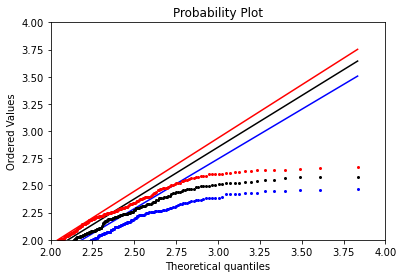

In [45]:
first_first_NAO = first_first.sel(mode = 'NAO').values
first_all_NAO = first_all.sel(mode = 'NAO').values
first_last_NAO = first_last.sel(mode = 'NAO').values

fig,ax = plt.subplots()
stats.probplot(first_first_NAO.reshape(-1),dist = 'norm',plot = ax)
stats.probplot(first_all_NAO.reshape(-1),dist = 'norm',plot = ax)
stats.probplot(first_last_NAO.reshape(-1),dist = 'norm',plot =  ax)

ax.get_lines()[0].set_markerfacecolor('b')
ax.get_lines()[0].set_markeredgecolor('b')
ax.get_lines()[0].set_markersize(2)
ax.get_lines()[1].set_color('b')

ax.get_lines()[2].set_markerfacecolor('k')
ax.get_lines()[2].set_markeredgecolor('k')
ax.get_lines()[2].set_markersize(2)
ax.get_lines()[3].set_color('k')

ax.get_lines()[4].set_markerfacecolor('r')
ax.get_lines()[4].set_markeredgecolor('r')
ax.get_lines()[4].set_markersize(2)
ax.get_lines()[5].set_color('r')

ax.set_xlim(2,4)
ax.set_ylim(2,4)

(2.0, 4.0)

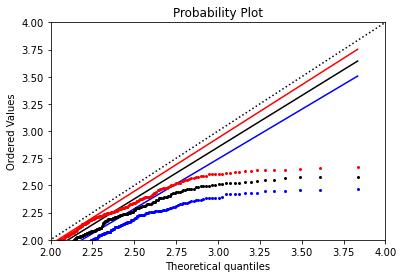

In [46]:
first_first_NAO = first_first.sel(mode = 'NAO').values
first_all_NAO = first_all.sel(mode = 'NAO').values
first_last_NAO = first_last.sel(mode = 'NAO').values

fig,ax = plt.subplots()
stats.probplot(first_first_NAO.reshape(-1),dist = 'norm',plot = ax)
stats.probplot(first_all_NAO.reshape(-1),dist = 'norm',plot = ax)
stats.probplot(first_last_NAO.reshape(-1),dist = 'norm',plot =  ax)

ax.get_lines()[0].set_markerfacecolor('b')
ax.get_lines()[0].set_markeredgecolor('b')
ax.get_lines()[0].set_markersize(2)
ax.get_lines()[1].set_color('b')

ax.get_lines()[2].set_markerfacecolor('k')
ax.get_lines()[2].set_markeredgecolor('k')
ax.get_lines()[2].set_markersize(2)
ax.get_lines()[3].set_color('k')

ax.get_lines()[4].set_markerfacecolor('r')
ax.get_lines()[4].set_markeredgecolor('r')
ax.get_lines()[4].set_markersize(2)
ax.get_lines()[5].set_color('r')
line = ax.plot(np.arange(-5,5,1),np.arange(-5,5,1),linestyle = 'dotted',color = 'k')
ax.set_xlim(2,4)
ax.set_ylim(2,4)

In [47]:
# hist
first_NAO_dfs = sis.pc_column([first_first,first_all,first_last])

<AxesSubplot:xlabel='pc', ylabel='Count'>

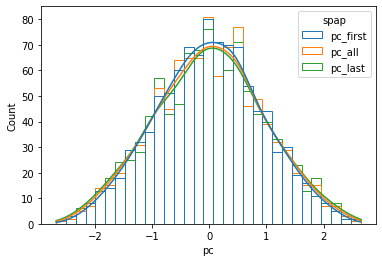

In [48]:
sns.histplot(first_NAO_dfs.loc[50000],x = 'pc',hue = 'spap',kde=True,fill=False,
)

In [49]:
first_EA_dfs = sis.pc_column([first_first,first_all,first_last],mode = 'EA')

<AxesSubplot:xlabel='pc', ylabel='Count'>

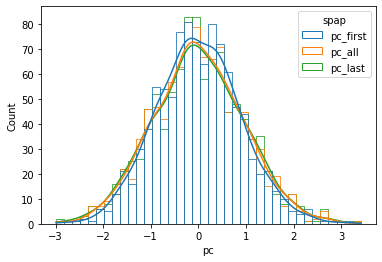

In [50]:
sns.histplot(first_EA_dfs.loc[50000],x = 'pc',hue = 'spap',kde=True,fill=False,
)

<AxesSubplot:xlabel='pc', ylabel='Count'>

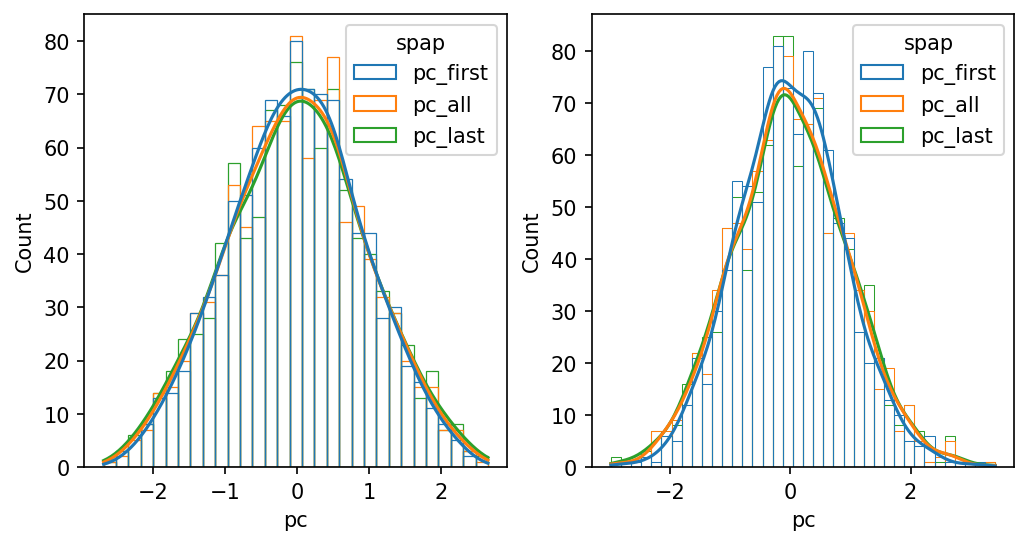

In [53]:
# hist
fig, axes = plt.subplots(1,2,figsize = (8,4),dpi = 150)
first_NAO_dfs = sis.pc_column([first_first,first_all,first_last])
sns.histplot(first_NAO_dfs.loc[50000],x = 'pc',hue = 'spap',kde=True,fill=False,
ax = axes[0])
first_EA_dfs = sis.pc_column([first_first,first_all,first_last],mode = 'EA')
sns.histplot(first_EA_dfs.loc[50000],x = 'pc',hue = 'spap',kde=True,fill=False,
ax= axes[1])

Text(0.5, 1.0, 'EA')

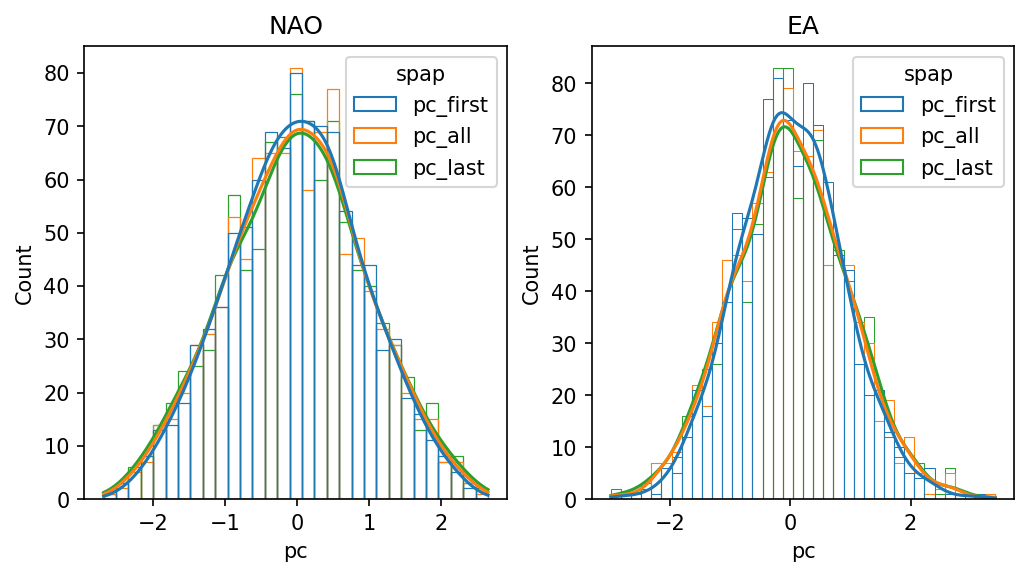

In [54]:
# hist
fig, axes = plt.subplots(1,2,figsize = (8,4),dpi = 150)
first_NAO_dfs = sis.pc_column([first_first,first_all,first_last])
sns.histplot(first_NAO_dfs.loc[50000],x = 'pc',hue = 'spap',kde=True,fill=False,
ax = axes[0])
first_EA_dfs = sis.pc_column([first_first,first_all,first_last],mode = 'EA')
sns.histplot(first_EA_dfs.loc[50000],x = 'pc',hue = 'spap',kde=True,fill=False,
ax= axes[1])
axes[0].set_title("NAO")
axes[1].set_title("EA")

Text(0.5, 1.0, 'EA')

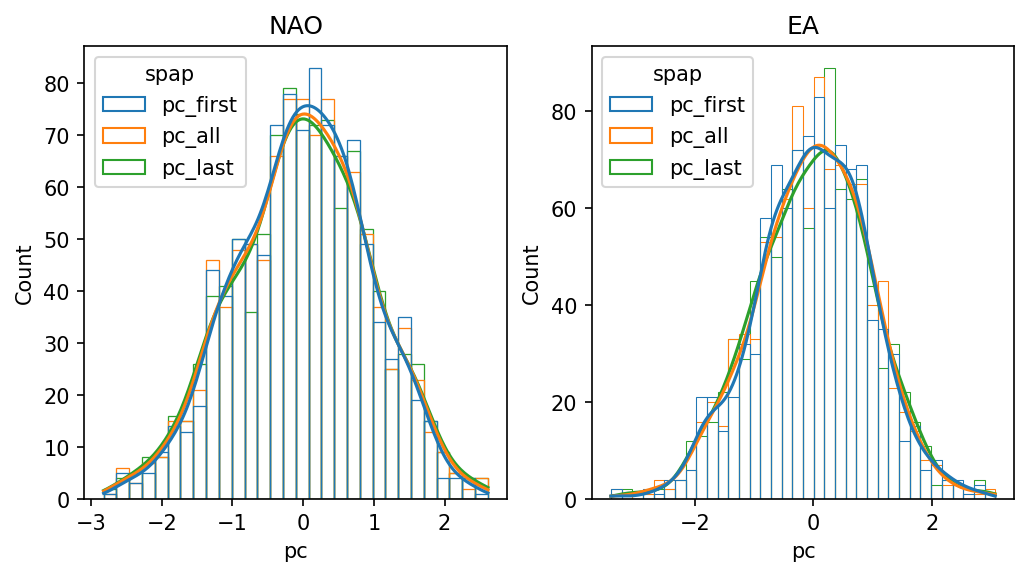

In [55]:
# hist
fig, axes = plt.subplots(1,2,figsize = (8,4),dpi = 150)
first_NAO_dfs = sis.pc_column([first_first,first_all,first_last])
sns.histplot(first_NAO_dfs.loc[100000],x = 'pc',hue = 'spap',kde=True,fill=False,
ax = axes[0])
first_EA_dfs = sis.pc_column([first_first,first_all,first_last],mode = 'EA')
sns.histplot(first_EA_dfs.loc[100000],x = 'pc',hue = 'spap',kde=True,fill=False,
ax= axes[1])
axes[0].set_title("NAO")
axes[1].set_title("EA")

In [56]:
first_first_all = first_first.to_dataframe().join(first_all.to_dataframe(),
lsuffix = '_first',rsuffix = '_all')
first_last_all = first_last.to_dataframe().join(first_all.to_dataframe(),
lsuffix = '_last',rsuffix = '_all'
)

In [58]:
mix_first = first_first.to_dataframe().join(first_all.to_dataframe(),
lsuffix = '_first',rsuffix = '_all')
mix_last = last_last.to_dataframe().join(last_all.to_dataframe(),
lsuffix = '_last',rsuffix = '_all'
)


## all levels
### all scatterplots

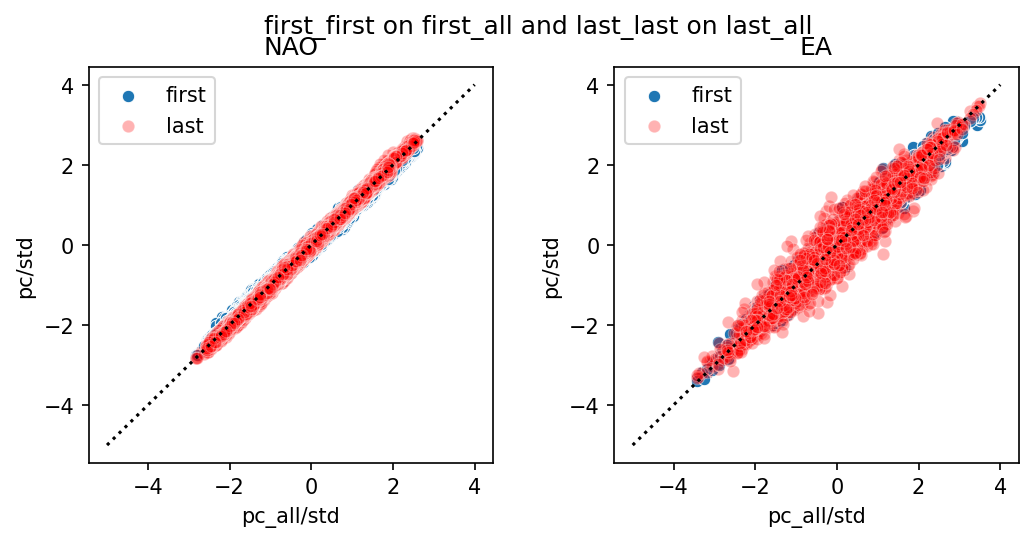

In [60]:
## scatter plot
sept.tenyr_scatter(first_first_all,first_last_all,hlayer = 'all')

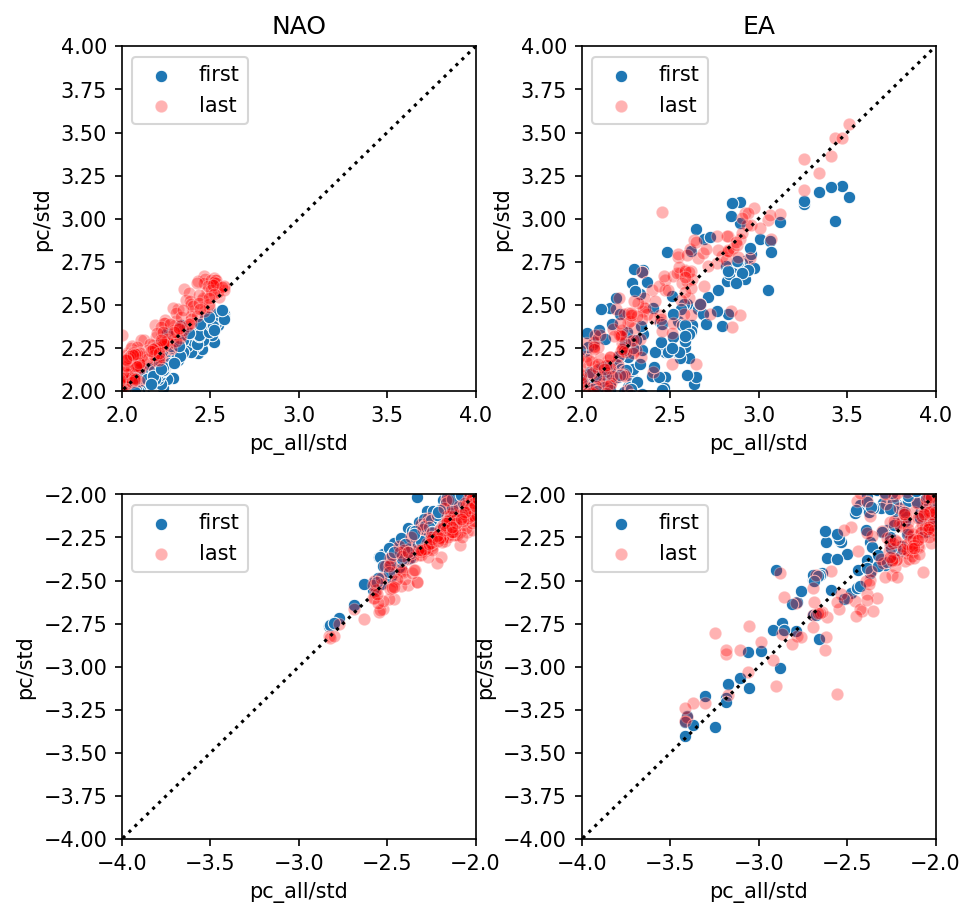

In [61]:
sept.tenyr_scatter_extreme(first_first_all,first_last_all,hlayer = 'all')

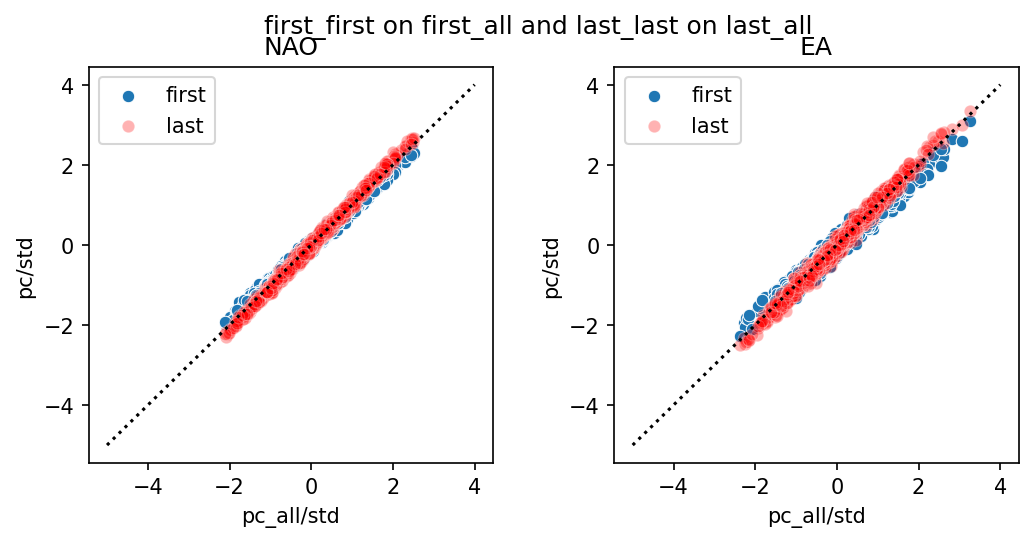

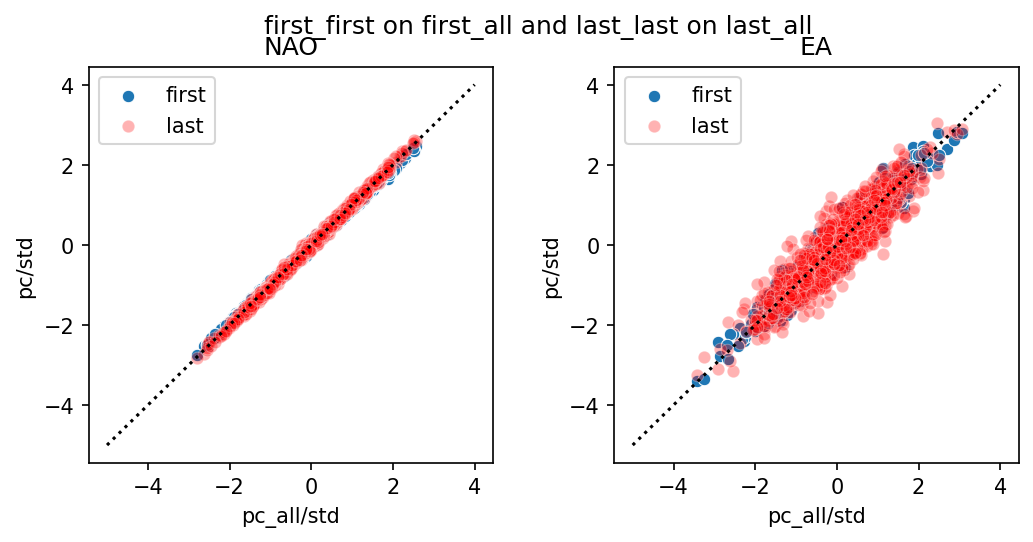

In [62]:
sept.tenyr_scatter(first_first_all,first_last_all,hlayer = 20000)
sept.tenyr_scatter(first_first_all,first_last_all,hlayer = 100000)

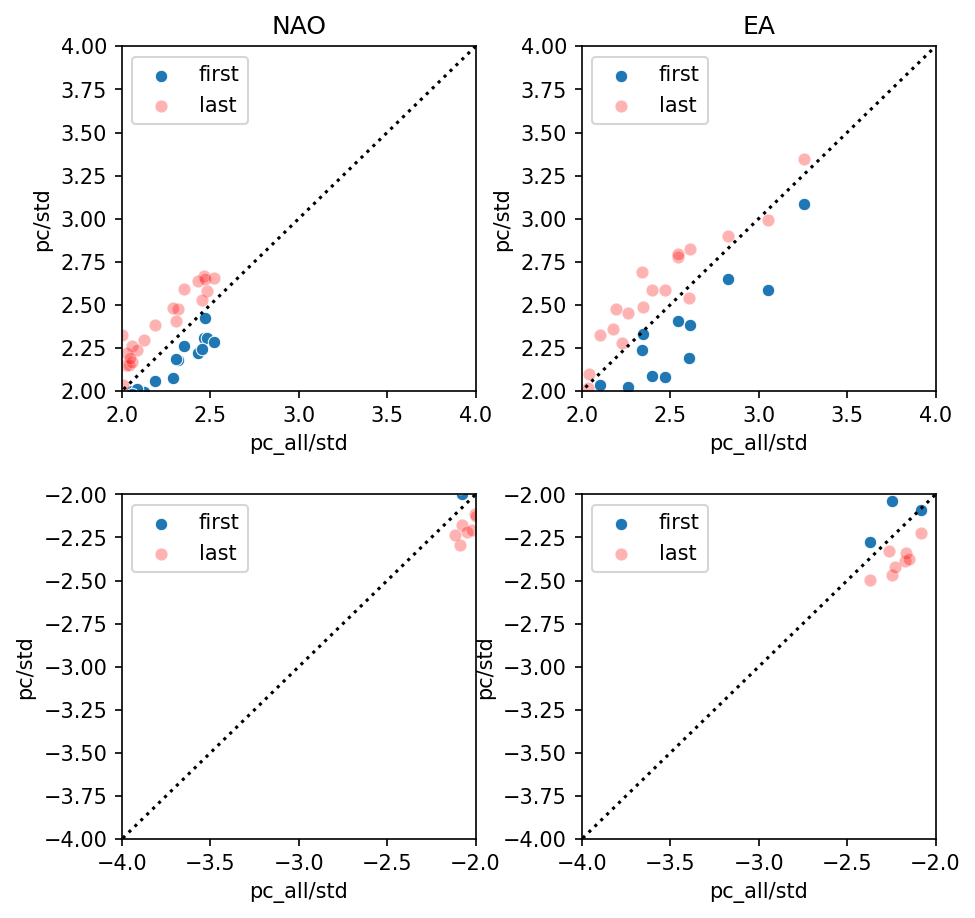

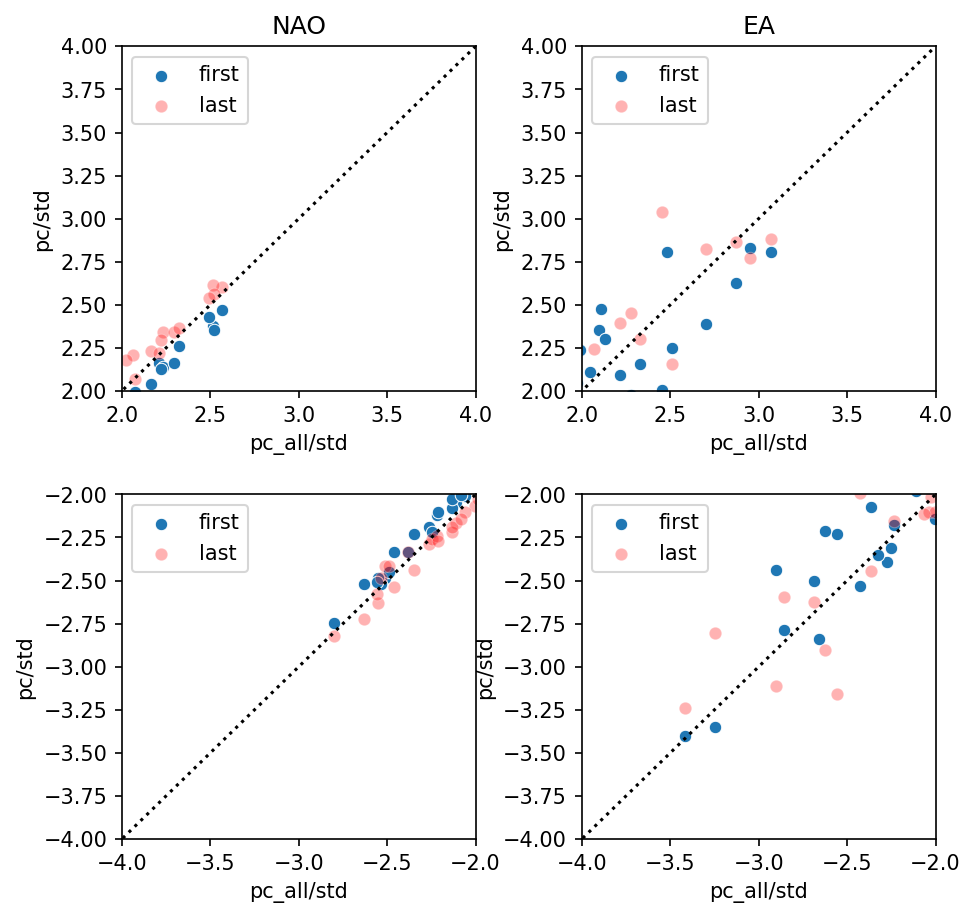

In [63]:
sept.tenyr_scatter_extreme(first_first_all,first_last_all,hlayer = 20000)
sept.tenyr_scatter_extreme(first_first_all,first_last_all,hlayer = 100000)

In [64]:
last_first_all = last_first.to_dataframe().join(last_all.to_dataframe(),
lsuffix = '_first',rsuffix = '_all')
last_last_all = last_last.to_dataframe().join(last_all.to_dataframe(),
lsuffix = '_last',rsuffix = '_all')

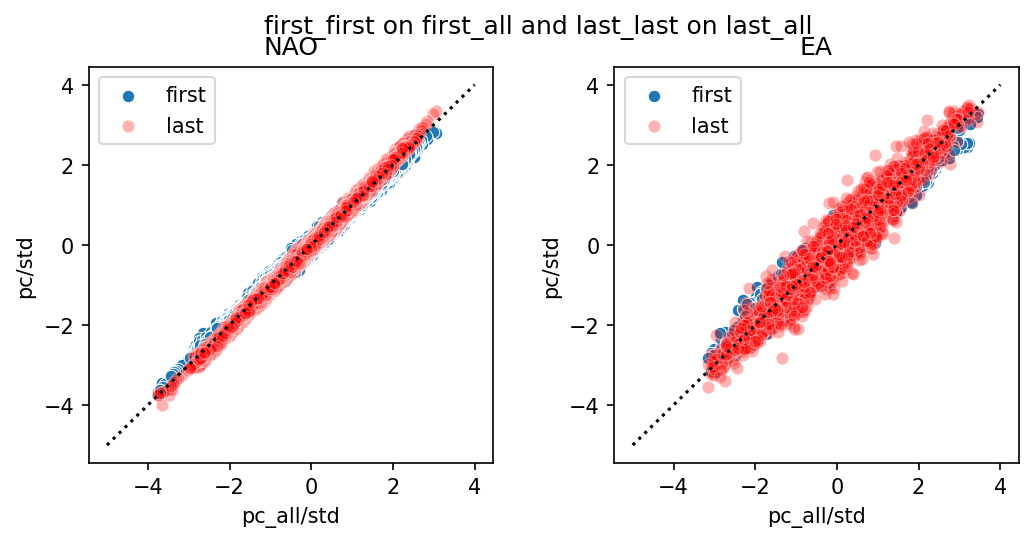

In [65]:
sept.tenyr_scatter(last_first_all,last_last_all,hlayer = 'all')

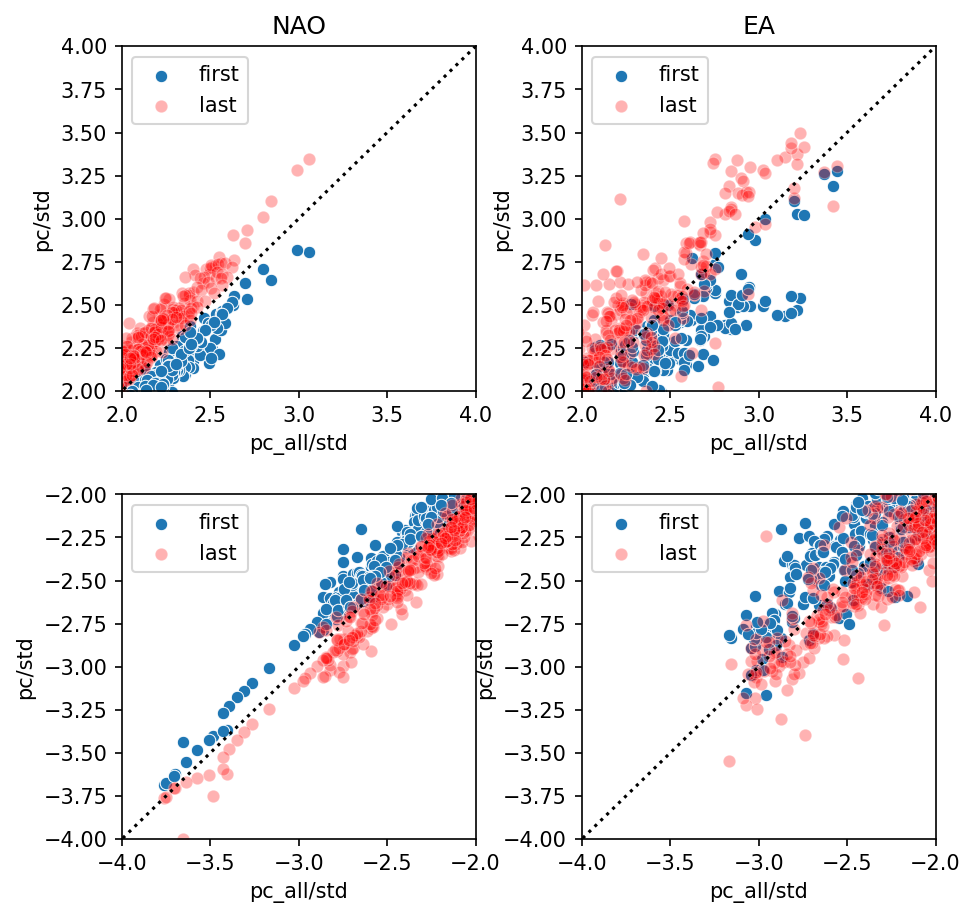

In [66]:
sept.tenyr_scatter_extreme(last_first_all,last_last_all,hlayer = 'all')

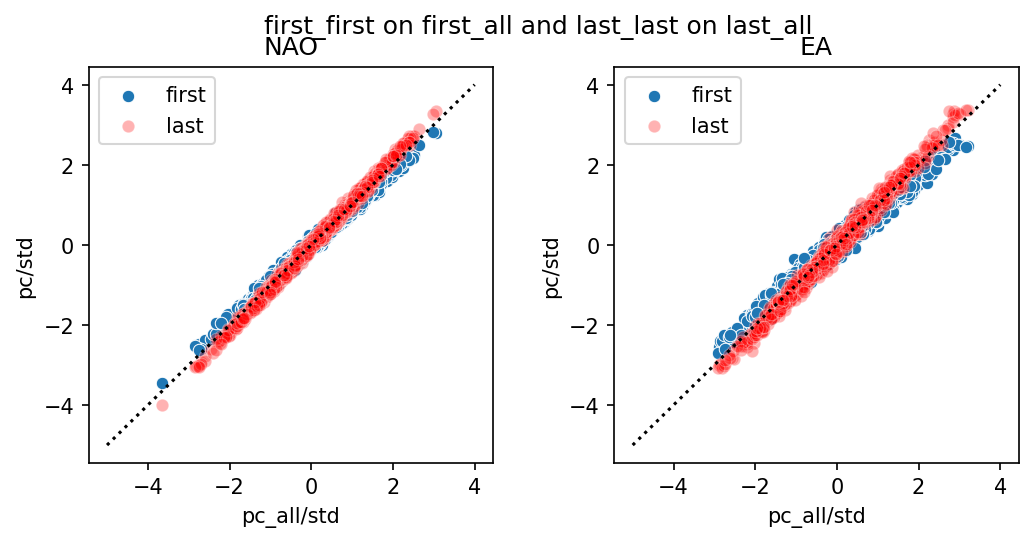

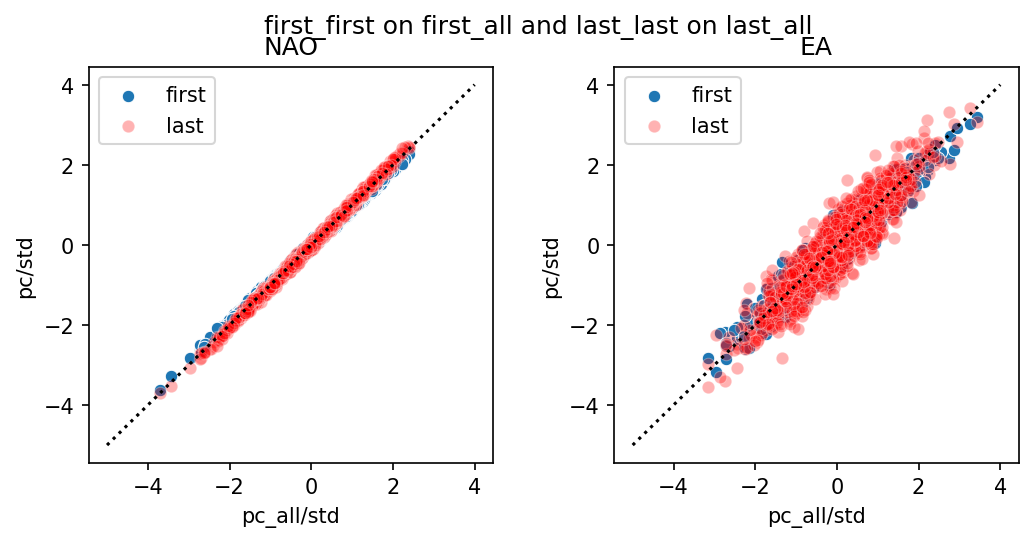

In [67]:
sept.tenyr_scatter(last_first_all,last_last_all,hlayer = 20000)
sept.tenyr_scatter(last_first_all,last_last_all,hlayer = 100000)

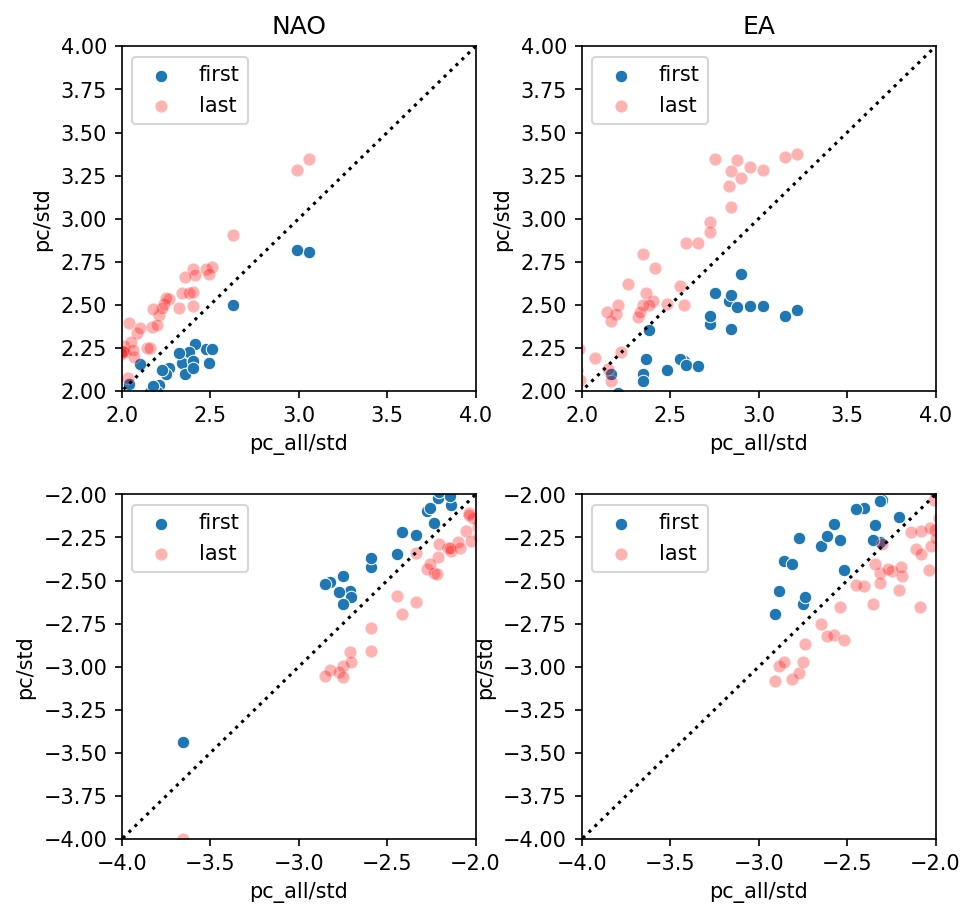

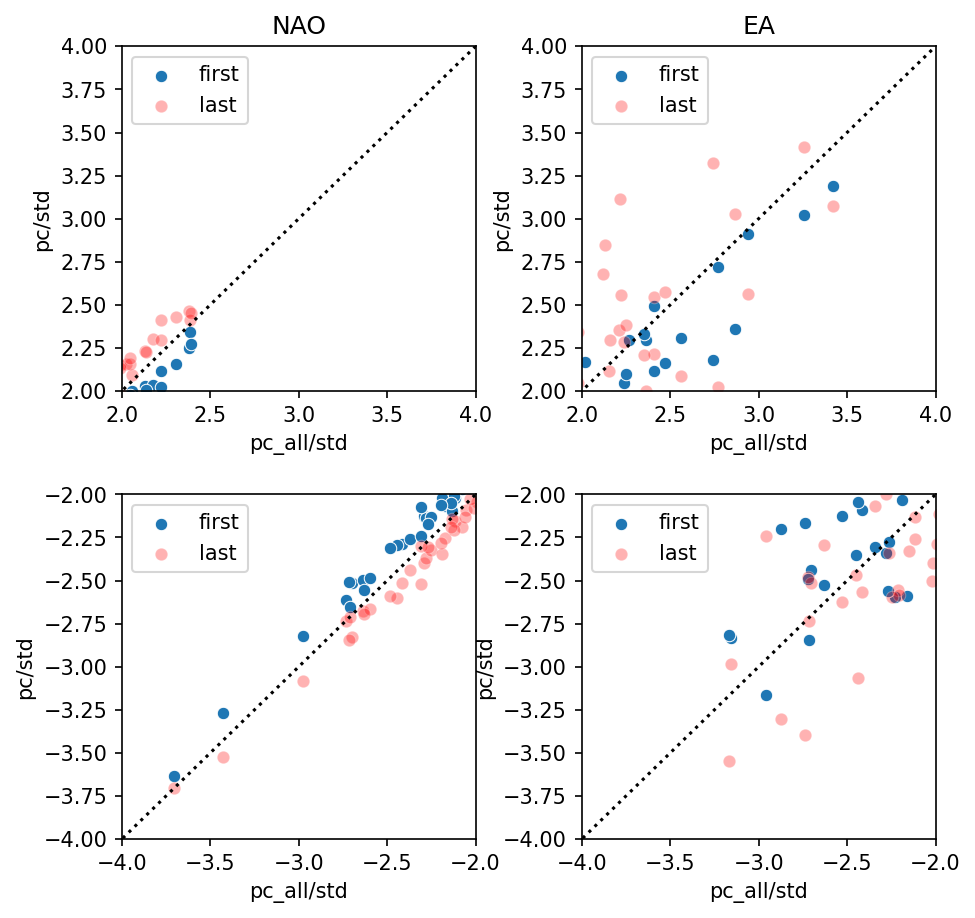

In [68]:
sept.tenyr_scatter_extreme(last_first_all,last_last_all,hlayer = 20000)
sept.tenyr_scatter_extreme(last_first_all,last_last_all,hlayer = 100000)